In [1]:
import os, geopandas as gpd

Peru=gpd.read_file(os.path.join("distritos","DISTRITOS.shp",))

In [2]:
Peru.head()

,OBJECTID_1,UBIGEO,CODDEP,DEPARTAMEN,CODPROV,PROVINCIA,CODDIST,DISTRITO,CAPITAL,FUENTE,geometry
0,1,030220,03,APURIMAC,02,ANDAHUAYLAS,20,JOSE MARIA ARGUEDAS,HUANCABAMBA,INEI,"POLYGON ((-73.37071 -13.70846, -73.36971 -13.7..."
1,2,030415,03,APURIMAC,04,AYMARAES,15,TINTAY,TINTAY,INEI,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8..."
2,3,030409,03,APURIMAC,04,AYMARAES,09,LUCRE,LUCRE,INEI,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8..."
3,4,030214,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,CHACCRAMPA,INEI,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9..."
4,5,030206,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,HUAYANA,INEI,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9..."


<Axes: >

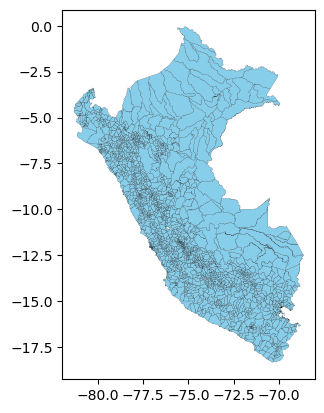

In [3]:
Peru.plot(facecolor="skyblue",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1)

In [8]:
import pandas as pd

excel_path = os.path.join("data_lima.xlsx")

data_lima = pd.read_excel(excel_path)
data_lima.head()

,Unnamed: 0,Matriculados Escuela Privada,Matriculados Escuela Pública
0,Lima,27146,41248
1,Ancón,4430,13215
2,Ate,66001,82591
3,Barranco,5126,9873
4,Breña,13520,8304


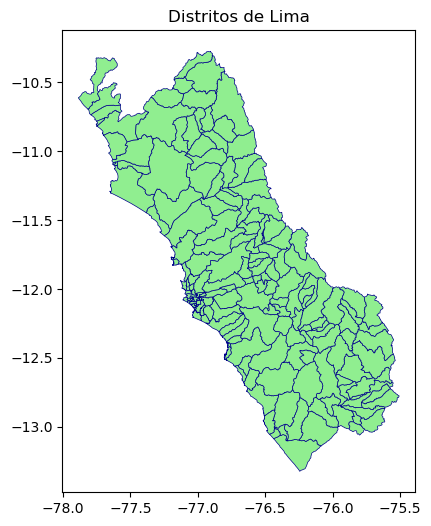

In [14]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Cargar el archivo shapefile de los distritos
Peru = gpd.read_file(os.path.join("distritos", "DISTRITOS.shp"))

# Filtrar solo los distritos de Lima
distritos_lima = Peru[Peru['DEPARTAMEN'] == 'LIMA']

# Crear la figura y el eje para el mapa de los distritos de Lima
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar el color del mapa (relleno) y de los bordes
distritos_lima.plot(facecolor="lightgreen", edgecolor="darkblue", linewidth=0.5, ax=ax)

# Añadir el título
plt.title('Distritos de Lima')

# Mostrar el gráfico
plt.show()


In [16]:
# Asegurarte de que los nombres de distritos en el shapefile y los datos de Excel estén en mayúsculas
# Usar .loc para evitar el 'SettingWithCopyWarning'
distritos_lima.loc[:, 'DISTRITO'] = distritos_lima['DISTRITO'].str.upper()

# Usar .loc para la normalización de la columna de distritos en el archivo Excel
data_lima.loc[:, 'Unnamed: 0'] = data_lima['Unnamed: 0'].str.upper()


In [18]:
# Ver las columnas del DataFrame de los distritos de Lima (shapefile)
print(distritos_lima.columns)

# Ver las columnas del DataFrame de Excel con los datos de matrícula
print(data_lima.columns)



Index(['OBJECTID_1', 'UBIGEO', 'CODDEP', 'DEPARTAMEN', 'CODPROV', 'PROVINCIA',
       'CODDIST', 'DISTRITO', 'CAPITAL', 'FUENTE', 'geometry'],
      dtype='object')
Index(['Unnamed: 0', 'Matriculados Escuela Privada',
       'Matriculados Escuela Pública'],
      dtype='object')


In [20]:
# Verificar qué nombres están solo en el shapefile y cuáles solo en el archivo Excel
onlyInShapefile = set(distritos_lima['DISTRITO']) - set(data_lima['Unnamed: 0'])
onlyInExcel = set(data_lima['Unnamed: 0']) - set(distritos_lima['DISTRITO'])

print("Nombres solo en el shapefile:", onlyInShapefile)
print("Nombres solo en el Excel:", onlyInExcel)


Nombres solo en el shapefile: {'IHUARI', 'SUMBILCA', 'SAN MATEO DE OTAO', 'SAYAN', 'HUANCAYA', 'NUEVO IMPERIAL', 'BARRANCA', 'SAN PEDRO DE LARAOS', 'AMBAR', 'SURCO', 'PACARAN', 'HUAÑEC', 'CATAHUASI', 'ALIS', 'VIÑAC', 'TAURIPAMPA', 'SAN MATEO', 'PUTINZA', 'QUILMANA', 'ANTIOQUIA', 'SAN PEDRO DE PILAS', 'ASIA', 'CARAMPOMA', 'HUANGASCAR', 'TUPE', 'CHOCOS', 'PARAMONGA', 'SAN JOAQUIN', 'COCHAS', 'CALETA DE CARQUIN', 'SAN VICENTE DE CAÑETE', 'CACRA', 'ANDAJES', 'HUARAL', 'ATAVILLOS ALTO', 'QUINOCAY', 'COLONIA', 'SUPE', 'VEINTISIETE DE NOVIEMBRE', 'LEONCIO PRADO', 'CHECRAS', 'SAN PEDRO DE CASTA', 'AZANGARO', 'CALLAHUANCA', 'CAUJUL', 'LAMPIAN', 'SAN JUAN DE IRIS', 'MARIATANA', 'SAN PEDRO DE HUANCAYRE', 'MADEAN', 'LACHAQUI', 'HUANZA', 'OYON', 'RICARDO PALMA', 'YAUYOS', 'QUINCHES', 'LAHUAYTAMBO', 'SAN MIGUEL DE ACOS', 'SANTIAGO DE TUNA', 'LINCHA', 'SANTA EULALIA', 'VITIS', 'VEGUETA', 'SANTA MARIA DEL MAR', 'PACCHO', 'HUAURA', 'HUACHUPAMPA', 'SANTA CRUZ DE ANDAMARCA', 'CERRO AZUL', 'PACARAOS', 'SU

In [22]:
# Normalizar los nombres de los distritos en el shapefile y Excel usando .loc para evitar advertencias
distritos_lima.loc[:, 'DISTRITO'] = distritos_lima['DISTRITO'].str.upper()
data_lima.loc[:, 'Unnamed: 0'] = data_lima['Unnamed: 0'].str.upper()

In [24]:
onlyInShapefile

{'ALIS',
 'ALLAUCA',
 'AMBAR',
 'ANCON',
 'ANDAJES',
 'ANTIOQUIA',
 'ARAHUAY',
 'ASIA',
 'ATAVILLOS ALTO',
 'ATAVILLOS BAJO',
 'AUCALLAMA',
 'AYAVIRI',
 'AZANGARO',
 'BARRANCA',
 'CACRA',
 'CAJATAMBO',
 'CALANGO',
 'CALETA DE CARQUIN',
 'CALLAHUANCA',
 'CANTA',
 'CARAMPOMA',
 'CARANIA',
 'CATAHUASI',
 'CAUJUL',
 'CERRO AZUL',
 'CHANCAY',
 'CHECRAS',
 'CHICLA',
 'CHILCA',
 'CHOCOS',
 'COAYLLO',
 'COCHAMARCA',
 'COCHAS',
 'COLONIA',
 'COPA',
 'CUENCA',
 'GORGOR',
 'HONGOS',
 'HUACHO',
 'HUACHUPAMPA',
 'HUALMAY',
 'HUAMANTANGA',
 'HUAMPARA',
 'HUANCAPON',
 'HUANCAYA',
 'HUANGASCAR',
 'HUANTAN',
 'HUANZA',
 'HUARAL',
 'HUAROCHIRI',
 'HUAROS',
 'HUAURA',
 'HUAÑEC',
 'IHUARI',
 'IMPERIAL',
 'JESUS MARIA',
 'LACHAQUI',
 'LAHUAYTAMBO',
 'LAMPIAN',
 'LANGA',
 'LARAOS',
 'LEONCIO PRADO',
 'LINCHA',
 'LUNAHUANA',
 'MADEAN',
 'MALA',
 'MANAS',
 'MARIATANA',
 'MATUCANA',
 'NAVAN',
 'NUEVO IMPERIAL',
 'OMAS',
 'OYON',
 'PACARAN',
 'PACARAOS',
 'PACCHO',
 'PACHANGARA',
 'PARAMONGA',
 'PATIVILCA',
 'P

In [26]:
onlyInExcel

{'ANCÓN',
 'JESÚS MARÍA',
 'RÍMAC',
 'SAN MARTÍN DE PORRES',
 'SANTA MARÍA DEL MAR',
 'VILLA MARÍA DEL TRIUNFO'}

In [28]:
# Unir los datos del shapefile de Lima con los datos del Excel de matrícula usando los distritos
merged_data = distritos_lima.merge(data_lima, left_on='DISTRITO', right_on='Unnamed: 0')

# Mostrar las primeras filas del DataFrame unido
merged_data.head()


,OBJECTID_1,UBIGEO,CODDEP,DEPARTAMEN,CODPROV,PROVINCIA,CODDIST,DISTRITO,CAPITAL,FUENTE,geometry,Unnamed: 0,Matriculados Escuela Privada,Matriculados Escuela Pública
0,845,150106,15,LIMA,01,LIMA,06,CARABAYLLO,CARABAYLLO,INEI,"POLYGON ((-76.90215 -11.72887, -76.90130 -11.7...",CARABAYLLO,41167,45680
1,846,150109,15,LIMA,01,LIMA,09,CIENEGUILLA,CIENEGUILLA,INEI,"POLYGON ((-76.72596 -11.99994, -76.72404 -11.9...",CIENEGUILLA,2121,4571
2,847,150119,15,LIMA,01,LIMA,19,LURIN,LURIN,INEI,"POLYGON ((-76.73251 -12.16450, -76.73100 -12.1...",LURIN,9510,15408
3,848,150123,15,LIMA,01,LIMA,23,PACHACAMAC,PACHACAMAC,INEI,"POLYGON ((-76.88798 -12.06179, -76.88134 -12.0...",PACHACAMAC,15677,21305
4,849,150124,15,LIMA,01,LIMA,24,PUCUSANA,PUCUSANA,INEI,"MULTIPOLYGON (((-76.79731 -12.47691, -76.79731...",PUCUSANA,854,3220


In [30]:
from thefuzz import process

# Comparar los nombres de los distritos en el shapefile con los que están solo en el Excel
comparisons = [(distrito_shp, process.extractOne(distrito_shp, onlyInExcel)) for distrito_shp in sorted(onlyInShapefile)]

# Mostrar los resultados de las comparaciones
comparisons


[('ALIS', ('SANTA MARÍA DEL MAR', 43)),
 ('ALLAUCA', ('VILLA MARÍA DEL TRIUNFO', 51)),
 ('AMBAR', ('VILLA MARÍA DEL TRIUNFO', 72)),
 ('ANCON', ('ANCÓN', 89)),
 ('ANDAJES', ('ANCÓN', 60)),
 ('ANTIOQUIA', ('ANCÓN', 60)),
 ('ARAHUAY', ('RÍMAC', 51)),
 ('ASIA', ('SANTA MARÍA DEL MAR', 64)),
 ('ATAVILLOS ALTO', ('VILLA MARÍA DEL TRIUNFO', 50)),
 ('ATAVILLOS BAJO', ('VILLA MARÍA DEL TRIUNFO', 49)),
 ('AUCALLAMA', ('RÍMAC', 60)),
 ('AYAVIRI', ('VILLA MARÍA DEL TRIUNFO', 49)),
 ('AZANGARO', ('SAN MARTÍN DE PORRES', 48)),
 ('BARRANCA', ('ANCÓN', 68)),
 ('CACRA', ('JESÚS MARÍA', 68)),
 ('CAJATAMBO', ('SANTA MARÍA DEL MAR', 45)),
 ('CALANGO', ('ANCÓN', 45)),
 ('CALETA DE CARQUIN', ('SANTA MARÍA DEL MAR', 51)),
 ('CALLAHUANCA', ('ANCÓN', 68)),
 ('CANTA', ('SANTA MARÍA DEL MAR', 76)),
 ('CARAMPOMA', ('RÍMAC', 60)),
 ('CARANIA', ('VILLA MARÍA DEL TRIUNFO', 49)),
 ('CATAHUASI', ('SANTA MARÍA DEL MAR', 42)),
 ('CAUJUL', ('ANCÓN', 36)),
 ('CERRO AZUL', ('RÍMAC', 45)),
 ('CHANCAY', ('ANCÓN', 68)),
 ('CH

In [32]:
print(merged_data.columns)

Index(['OBJECTID_1', 'UBIGEO', 'CODDEP', 'DEPARTAMEN', 'CODPROV', 'PROVINCIA',
       'CODDIST', 'DISTRITO', 'CAPITAL', 'FUENTE', 'geometry', 'Unnamed: 0',
       'Matriculados Escuela Privada', 'Matriculados Escuela Pública'],
      dtype='object')


In [34]:
# Verificar los tipos de las columnas
print(data_lima.dtypes)

# Convertir a string solo si las columnas no son de tipo string
if not pd.api.types.is_string_dtype(data_lima['Matriculados Escuela Privada']):
    data_lima['Matriculados Escuela Privada'] = data_lima['Matriculados Escuela Privada'].astype(str)

if not pd.api.types.is_string_dtype(data_lima['Matriculados Escuela Pública']):
    data_lima['Matriculados Escuela Pública'] = data_lima['Matriculados Escuela Pública'].astype(str)

# Remover las comas y convertir a enteros
data_lima['Matriculados Escuela Privada'] = data_lima['Matriculados Escuela Privada'].str.replace(',', '').astype(int)
data_lima['Matriculados Escuela Pública'] = data_lima['Matriculados Escuela Pública'].str.replace(',', '').astype(int)

# Calcular la diferencia entre matriculados en escuelas públicas y privadas
data_lima['diferencia'] = data_lima['Matriculados Escuela Pública'] - data_lima['Matriculados Escuela Privada']

# Asignar el estado según la diferencia
data_lima['estado'] = data_lima['diferencia'].apply(lambda x: 'Mejoró' if x > 0 else 'Empeoró')

# Mostrar las primeras filas del DataFrame procesado
data_lima.head()


Unnamed: 0                      object
Matriculados Escuela Privada     int64
Matriculados Escuela Pública     int64
dtype: object


,Unnamed: 0,Matriculados Escuela Privada,Matriculados Escuela Pública,diferencia,estado
0,LIMA,27146,41248,14102,Mejoró
1,ANCÓN,4430,13215,8785,Mejoró
2,ATE,66001,82591,16590,Mejoró
3,BARRANCO,5126,9873,4747,Mejoró
4,BREÑA,13520,8304,-5216,Empeoró


In [36]:
# Renombrar la columna 'Unnamed: 0' a 'DISTRITOS'
data_lima = data_lima.rename(columns={'Unnamed: 0': 'DISTRITOS'})

# Verificar que el cambio fue exitoso
print(data_lima.columns)


Index(['DISTRITOS', 'Matriculados Escuela Privada',
       'Matriculados Escuela Pública', 'diferencia', 'estado'],
      dtype='object')


In [38]:
# Ver las primeras filas del DataFrame para verificar qué columna corresponde a Lima
print(merged_data.head())

# O verificar los valores únicos de la columna que podría identificar Lima
print(merged_data['DEPARTAMEN'].unique())


   OBJECTID_1  UBIGEO CODDEP DEPARTAMEN CODPROV PROVINCIA CODDIST  \
0         845  150106     15       LIMA      01      LIMA      06   
1         846  150109     15       LIMA      01      LIMA      09   
2         847  150119     15       LIMA      01      LIMA      19   
3         848  150123     15       LIMA      01      LIMA      23   
4         849  150124     15       LIMA      01      LIMA      24   

      DISTRITO      CAPITAL FUENTE  \
0   CARABAYLLO   CARABAYLLO   INEI   
1  CIENEGUILLA  CIENEGUILLA   INEI   
2        LURIN        LURIN   INEI   
3   PACHACAMAC   PACHACAMAC   INEI   
4     PUCUSANA     PUCUSANA   INEI   

                                            geometry   Unnamed: 0  \
0  POLYGON ((-76.90215 -11.72887, -76.90130 -11.7...   CARABAYLLO   
1  POLYGON ((-76.72596 -11.99994, -76.72404 -11.9...  CIENEGUILLA   
2  POLYGON ((-76.73251 -12.16450, -76.73100 -12.1...        LURIN   
3  POLYGON ((-76.88798 -12.06179, -76.88134 -12.0...   PACHACAMAC   
4  MULTIPOL

C:\Users\Sistema\AppData\Local\Temp\ipykernel_12004\2428110995.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(distritos_lima.geometry.centroid.x, distritos_lima.geometry.centroid.y, distritos_lima['DISTRITO']):


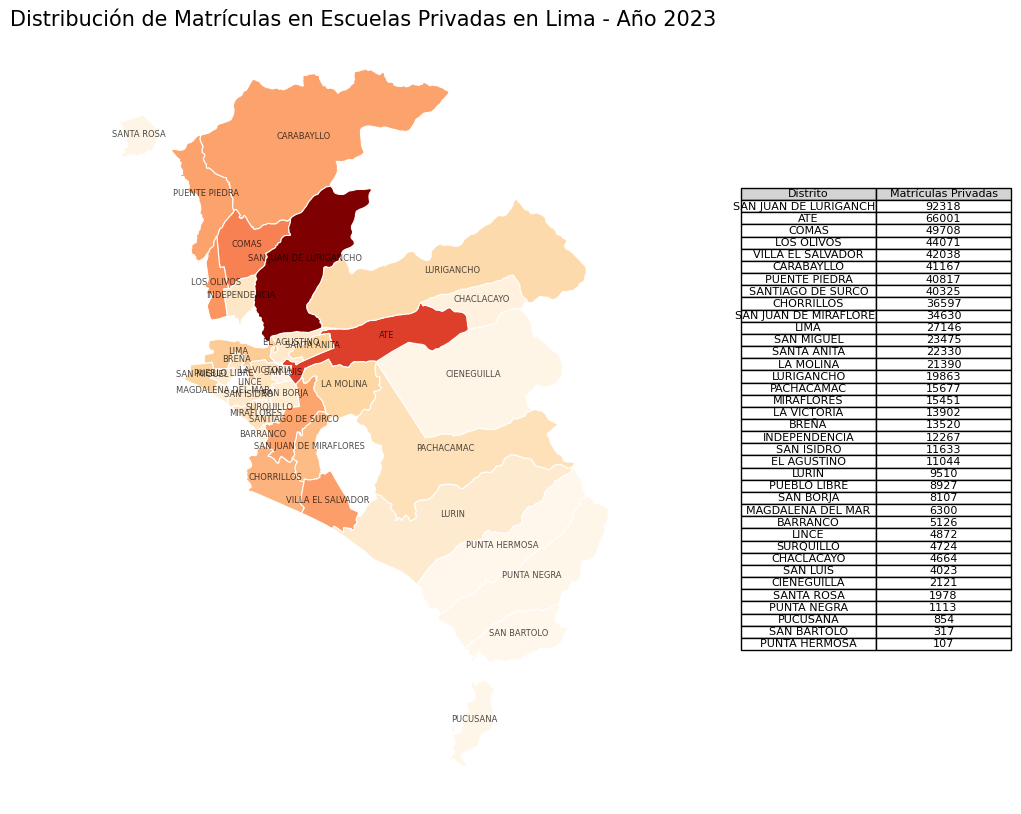

In [40]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Filtrar solo los distritos de Lima Metropolitana
lima_bounds = [-77.5, -12.5, -76.5, -11.5]  # Aproximación para las coordenadas de Lima Metropolitana
distritos_lima = merged_data.cx[lima_bounds[0]:lima_bounds[2], lima_bounds[1]:lima_bounds[3]]

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Graficar solo los distritos de Lima con las matrículas privadas
distritos_lima.plot(column='Matriculados Escuela Privada', ax=ax, cmap='OrRd', linewidth=0.8, edgecolor='white')

# Añadir los nombres de los distritos con un tamaño de fuente más pequeño y con un ajuste en la posición
for x, y, label in zip(distritos_lima.geometry.centroid.x, distritos_lima.geometry.centroid.y, distritos_lima['DISTRITO']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black', alpha=0.7)

# Crear el cuadro resumen con los nombres de los distritos y el número de alumnos matriculados
table_data = distritos_lima[['DISTRITO', 'Matriculados Escuela Privada']].sort_values(by='Matriculados Escuela Privada', ascending=False)

# Añadir el cuadro resumen al gráfico
from matplotlib.table import table

# Convertir los datos en una lista para agregar al cuadro
table_data_list = table_data.values.tolist()
column_labels = ['Distrito', 'Matrículas Privadas']

# Crear el cuadro en el lado derecho del gráfico
table = plt.table(cellText=table_data_list,
                  colLabels=column_labels,
                  cellLoc='center',
                  loc='right',
                  colColours=['lightgray', 'lightgray'],
                  bbox=[1.2, 0.2, 0.5, 0.6])  # Ajusta la posición y el tamaño del cuadro

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)  # Ajustar el tamaño de la tabla

# Personalizar el gráfico (Eliminar los ejes)
ax.set_title('Distribución de Matrículas en Escuelas Privadas en Lima - Año 2023', fontsize=15)
ax.set_axis_off()  # Eliminar los ejes para un gráfico más limpio

# Guardar el gráfico ajustando los márgenes
plt.savefig('matriculas_privadas_lima_2023_sin_barras_ajustado.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\Sistema\AppData\Local\Temp\ipykernel_12004\1558473565.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(distritos_lima.geometry.centroid.x, distritos_lima.geometry.centroid.y, distritos_lima['DISTRITO']):


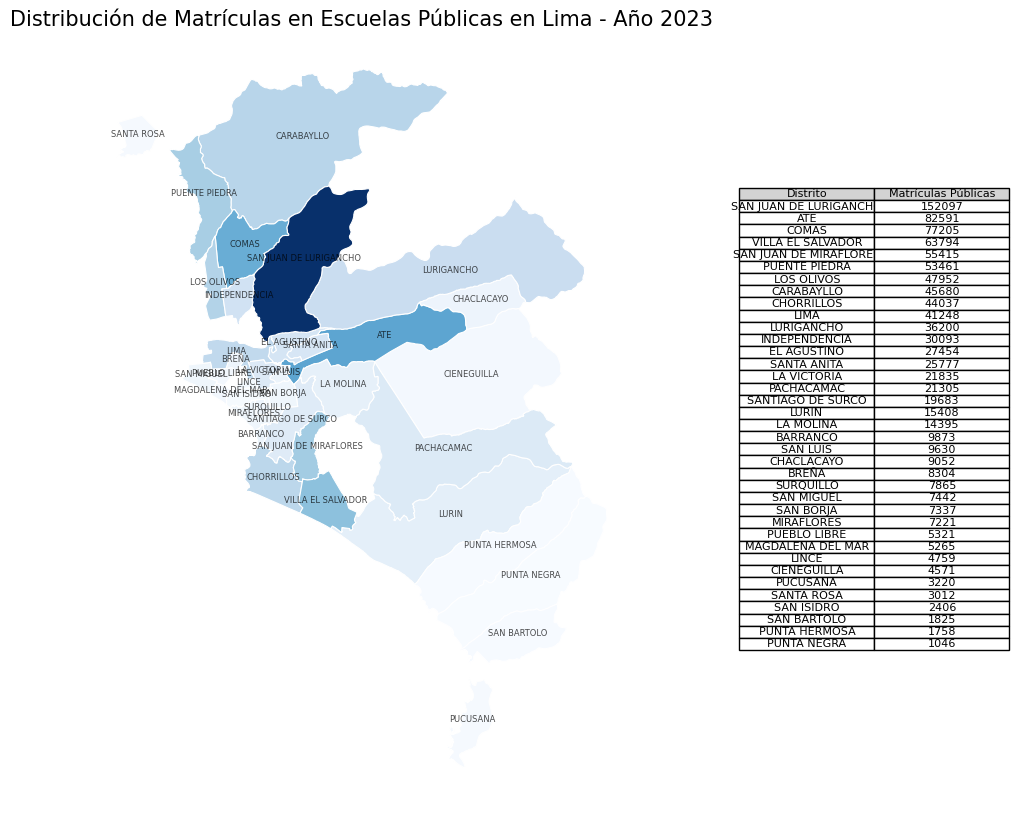

In [42]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Filtrar solo los distritos de Lima Metropolitana
lima_bounds = [-77.5, -12.5, -76.5, -11.5]  # Aproximación para las coordenadas de Lima Metropolitana
distritos_lima = merged_data.cx[lima_bounds[0]:lima_bounds[2], lima_bounds[1]:lima_bounds[3]]

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Graficar solo los distritos de Lima con las matrículas públicas
distritos_lima.plot(column='Matriculados Escuela Pública', ax=ax, cmap='Blues', linewidth=0.8, edgecolor='white')

# Añadir los nombres de los distritos con un tamaño de fuente más pequeño y con un ajuste en la posición
for x, y, label in zip(distritos_lima.geometry.centroid.x, distritos_lima.geometry.centroid.y, distritos_lima['DISTRITO']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black', alpha=0.7)

# Crear el cuadro resumen con los nombres de los distritos y el número de alumnos matriculados en escuelas públicas
table_data = distritos_lima[['DISTRITO', 'Matriculados Escuela Pública']].sort_values(by='Matriculados Escuela Pública', ascending=False)

# Añadir el cuadro resumen al gráfico
from matplotlib.table import table

# Convertir los datos en una lista para agregar al cuadro
table_data_list = table_data.values.tolist()
column_labels = ['Distrito', 'Matrículas Públicas']

# Crear el cuadro en el lado derecho del gráfico
table = plt.table(cellText=table_data_list,
                  colLabels=column_labels,
                  cellLoc='center',
                  loc='right',
                  colColours=['lightgray', 'lightgray'],
                  bbox=[1.2, 0.2, 0.5, 0.6])  # Ajusta la posición y el tamaño del cuadro

table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)  # Ajustar el tamaño de la tabla

# Personalizar el gráfico (Eliminar los ejes)
ax.set_title('Distribución de Matrículas en Escuelas Públicas en Lima - Año 2023', fontsize=15)
ax.set_axis_off()  # Eliminar los ejes para un gráfico más limpio

# Guardar el gráfico ajustando los márgenes
plt.savefig('matriculas_publicas_lima_2023_sin_barras_ajustado.png', bbox_inches='tight', dpi=300)
plt.show()
